# PP2 - B555 ML
© Haici Yang (hy17@iu.edu)

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import random
import time
from numpy import linalg as LA

In [2]:
# import all the csv data from folder
data_cat = set()
for filenames in glob.glob('pp2data/*.csv'):
    vname = filenames[filenames.find('/')+1:filenames.find('.')]
    vname = vname.replace('-','_')
    data_cat.add(vname[vname.find('_'):])
    #print(vname)
    df = pd.read_csv(filenames, header = None)
    exec('%s = df' % vname) 
    

In [3]:
def train_w(X, Y, ld):
    Phi = np.array(X)
    N = Phi.shape[0]
    M = Phi.shape[1]
    t = np.array(Y)
    w = LA.inv(ld * np.identity(M) + Phi.T.dot(Phi)).dot(Phi.T).dot(t)
    
    return w


def MSE(X, Y, w):
    Phi = np.array(X)
    N = Phi.shape[0]
    M = Phi.shape[1]
    t = np.array(Y)
    MSE = sum(np.square(Phi.dot(w)-t))/N    
    return MSE


### Task 1 : Regularization

$$w=(\lambda I + \Phi^T\Phi)^{-1}\Phi^Tt$$

$$ MSE = \frac{1}{N} \sum (\Phi w-t) $$

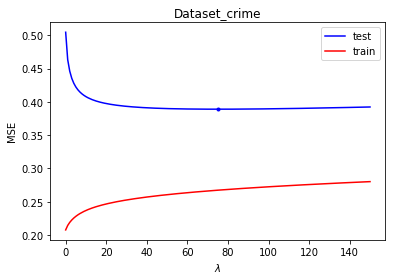

Data_crime
	small:  75
	medium:  120
	large:  0
	running time:  0.388 s



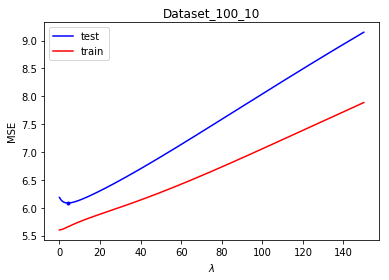

Data_100_10
	small:  4
	medium:  75
	large:  150
	running time:  0.143 s



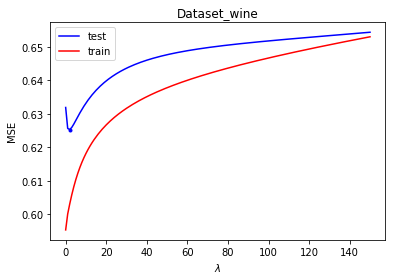

Data_wine
	small:  2
	medium:  75
	large:  150
	running time:  0.527 s



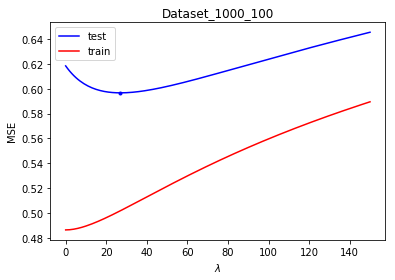

Data_1000_100
	small:  27
	medium:  78
	large:  150
	running time:  0.344 s



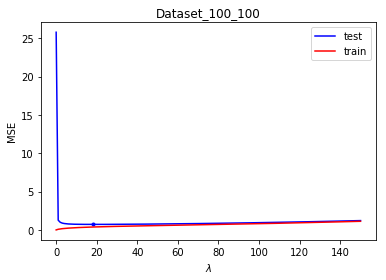

Data_100_100
	small:  18
	medium:  79
	large:  0
	running time:  0.170 s



In [29]:
for i in data_cat:
    # Define dataset
    exec('train_x = %s' % 'train'+i) 
    exec('train_y = %s' % 'trainR'+i)
    exec('test_x = %s' % 'test'+i)
    exec('test_y = %s' % 'testR'+i)
    
    # Train weight calculate MSE     
    MSE_tr = []
    MSE_te = []
    
    start = time.time()
    for ld in range(151):
        w = train_w(train_x, train_y,ld)
        MSE_tr.append(MSE(train_x, train_y, w))
        MSE_te.append(MSE(test_x, test_y, w))
    end = time.time()
    
    # Depict plots of MSE as function of lambda
    plt.figure()
    plt.plot(range(151), MSE_te, color = 'b', label = 'test')
    plt.plot(range(151), MSE_tr, color = 'r', label = 'train')
    plt.scatter(np.argmin(MSE_te), min(MSE_te), marker = '.', color = 'b' )
    plt.xlabel('$\lambda$')
    plt.ylabel('MSE')
    plt.legend()
    plt.title('Dataset' + i)
    plt.show()
    

    print("Data"+i)
    print('\tsmall: ', np.argmin(MSE_te))
    print('\tmedium: ', MSE_te.index(np.median(MSE_te)))
    print('\tlarge: ', np.argmax(MSE_te))
    print('\trunning time: ', '{:.3f}'.format(end-start), 's\n')
    

- **Comparation of MSE**

    Comapred with the MSE of the hidden true functions generating the data, the MSE results on training on testing data tends to be higher. It turns out that only the lowest MSE training data get is around the MSE set to generate the data.

- **Why can't the training set MSE be used to select $\lambda$ ?**

    $\lambda$ is introduced here to handle the "overfitting" problem raised in testing process. The introduction of $\lambda$ actually dimishes the training accuray to balance the evidence of the model. So $\lambda$ can only increase the MSE of training data set.

- **How does $\lambda$ affect error on the test set?**
    
    At the begining, test set gets better result as $\lambda$ increases. That's during the range when increase of $\lambda$ reduce the overfitting problem. After a certain point, test error gets higher. 

- **Does this differ for different datasets? How do you explain these variations?**
 - The trends of error based on $\lambda$ for different datasets are the same, which is going down rapidly at the begining then go up slowly. But their shape is a little different, reflecting on the different values of $\lambda$ when MSEs reach their highest or lowest. 
 - The variation can result from the sizes of training sets and testing sets as well as their ratio. For instance, Dataset_100_100 shows a very sharp drop off in this case. It's due to the fact that size of this training set is too small in terms of the size of the testing set. The severe falling shows when $\lambda$ is small the training data are overtrained.

### Task 2 : Learning Curves

Three $\lambda$ chosen : 0, 75, 150

In [34]:
train_x = np.array(train_1000_100)
train_y = np.array(trainR_1000_100)
test_x = np.array(test_1000_100)
test_y = np.array(testR_1000_100)

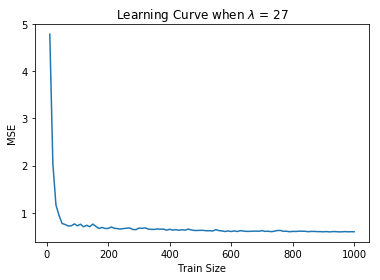

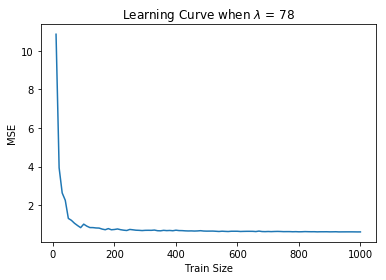

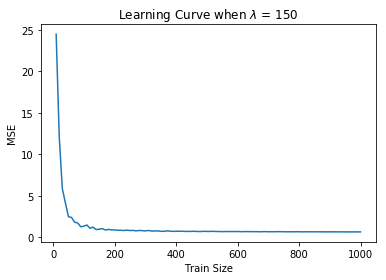

In [35]:
ld_l = [27, 78, 150]
#train_size = list(np.arange(0.01,0.11,0.01))+list(np.arange(0.1,1.1,0.1))    
train_size = np.arange(0.01, 1.01, 0.01)

for ld in ld_l: 
    MSE_te = []
    for size in train_size:
        samples = random.sample(list(range(1000)), int(size * 1000))
        train_set_x = train_x[samples,:]
        train_set_y = train_y[samples,:]
        #print(train_set_x.shape)
        mte = 0
        for i in range(20):
            w = train_w(train_set_x, train_set_y, ld)
            mte += MSE(test_x, test_y, w) 
            #print(mte)
        MSE_te.append(mte/20)

    plt.figure()
    plt.plot(np.array(train_size)* 1000, MSE_te)
    plt.xlabel('Train Size')
    plt.ylabel('MSE')
    plt.title('Learning Curve when $\lambda$ = %s' %ld)
    plt.show()


- **What can you observe from the plots regarding the dependence of the error on $\lambda$ and on the number of samples?**
    - As training size is increasing, MSE falls obviously when training size is small. 
    - After a certain point, the MSE value tends to converge.
    - Given the fact that the MSE in all the images above are converging to 0.60 - 0.64, as $\lambda$ gets higher MSE becomes more sensitive to the size of the training size.

- **Consider both the case of small training set sizes and large training set sizes. How do you explain these variations?**
    - As the training set size is small, the MSE values differ much in all three experiments. While as training size is large, they are pretty stable.
    - $\lambda$ was initially set to handle overfitting problems. As for the overfitting issue, it gets severe while training set size is small and there is less samples to learn from. So as the training set size is small, the model is more sensitive to the introduction and value of $\lambda$.

### Task 3.1 : Model Selection using Cross Validation

In [31]:
fold = 10 # 10 folds to do cross validation

for i in data_cat:
    # Define dataset
    exec('train_x = np.array(%s' % 'train'+i+')') 
    exec('train_y = np.array(%s' % 'trainR'+i+')')
    exec('test_x = np.array(%s' % 'test'+i+')')
    exec('test_y = np.array(%s' % 'testR'+i+')')
    
    # Build folds for train set
    start = time.time()
    rindex=np.random.permutation(len(train_x)) # shuffle and split folds randomly
    x_fold = []
    y_fold = []
    f_len = int(len(train_x)/fold)
    MSE_ld = []
    for ld in range(151):
        mse = 0
        for k in range(fold):
            test_index = rindex[k * f_len:(k + 1) * f_len]
            train_index = [t for t in rindex if t not in test_index]
            te_x_fold = train_x[test_index]
            te_y_fold = train_y[test_index]
            tr_x_fold = train_x[train_index]
            tr_y_fold = train_y[train_index]

            w = train_w(tr_x_fold, tr_y_fold, ld)
            mse += MSE(te_x_fold, te_y_fold, w)
            
        MSE_ld.append(mse/fold) # Average MSE of all Cross validation
        
    ld_est = np.argmin(MSE_ld)  # Estimated Lambda for each dataset based on training set
    
    # test estimated lambda on testing set
    
    w = train_w(train_x, train_y, ld_est)
    mse = MSE(train_x, train_y, w)
    
    end = time.time()
    
    print('dataset' + i + ': ')
    print('\tlambda: ', '{:.0f}'.format(ld_est))
    print('\tmse: ', '{:.3f}'.format(mse[0]))
    print('\truntime', '{:.3f}'.format(end - start),'s')
    

dataset_crime: 
	lambda:  150
	mse:  0.280
	runtime 2.324 s
dataset_100_10: 
	lambda:  17
	mse:  5.846
	runtime 0.621 s
dataset_wine: 
	lambda:  2
	mse:  0.603
	runtime 2.369 s
dataset_1000_100: 
	lambda:  26
	mse:  0.501
	runtime 7.170 s
dataset_100_100: 
	lambda:  12
	mse:  0.321
	runtime 1.024 s


- **How do the results compare to the best test-set results from part 1 both in terms of the choice of $\lambda$ and test set MSE?**
    - The choices of $\lambda$ don't differ too much regarding to the two methods. 
    - In general, testing MSEs got through cross validation are lower than those through regularized linear regression. This indicates that cross validation has sucessfully reduced the overfitting effect.

### Task 3.2: Bayesian Model Selection

In [30]:
import math
# Define variables
for i in data_cat:
    # Define dataset
    exec('train_x = np.array(%s' % 'train'+i+')') 
    exec('train_y = np.array(%s' % 'trainR'+i+')')
    exec('test_x = np.array(%s' % 'test'+i+')')
    exec('test_y = np.array(%s' % 'testR'+i+')')

    Phi = train_x
    t = train_y
    N = Phi.shape[0]
    M = Phi.shape[1]

    start = time.time()  

    random.seed(0)
    beta = random.uniform(1, 10)
    alpha = random.uniform(1, 10)

    while True: 
        l, _ = LA.eig(Phi.T.dot(Phi))
        ld = beta * l
        gamma = np.sum(ld / (alpha + ld))
        Sn = LA.inv(alpha * np.identity(M) + beta * Phi.T.dot(Phi))
        Mn = beta * Sn.dot(Phi.T).dot(t)
        alpha_n  = gamma / Mn.T.dot(Mn)[0][0]
        beta_n = 1 / (sum(np.square(t - Phi.dot(Mn)))/(N - gamma))[0]

        if math.isclose(beta_n, beta) and math.isclose(alpha_n, alpha) :
            break
        else:
            alpha = alpha_n
            beta = beta_n

    end = time.time()
    w_map = Mn
    print('data' + i + ': ')
    print('\talpha: ', '{:.3f}'.format(alpha))
    print('\tbeta: ', '{:.3f}'.format(beta))
    print('\tlambda: ', '{:.0f}'.format(alpha / beta))
    print('\tMSE: ', '{:.3f}'.format(MSE(test_x, test_y, w_map)[0]))
    print('\trunning time: ', '{:.3f}'.format(end - start),'s')


data_crime: 
	alpha:  425.645
	beta:  3.250
	lambda:  131
	MSE:  0.391
	running time:  0.066 s
data_100_10: 
	alpha:  0.882
	beta:  0.165
	lambda:  5
	MSE:  6.088
	running time:  0.002 s
data_wine: 
	alpha:  6.164
	beta:  1.610
	lambda:  4
	MSE:  0.627
	running time:  0.013 s
data_1000_100: 
	alpha:  10.286
	beta:  1.860
	lambda:  6
	MSE:  0.608
	running time:  0.032 s
data_100_100: 
	alpha:  5.155
	beta:  3.154
	lambda:  2
	MSE:  1.064
	running time:  0.064 s


- **How do the results compare to the best test-set results from part 1 both in terms of the choice of $\lambda$ and test set MSE?**
    - Bayesian Model gives more different $\lambda$ choices with the regularized linear regression.
    - But in terms of MSE, the values Bayesian Model derives are pretty similar to those from task1.

### Task 3.3

- In terms of the choice of $\lambda$, Bayesian model gives smaller number, indicating less importance of the regularized parameter in the model.
- Cross validation gives significant lower MSE than bayesian model while bayesian model makes it up by its huge advantage on running time.
- Consider the size of all the data experimented above, data_crime, data_wine and data_1000_100 are relatively bigger. The test MSEs of those larger datasets are in general lower, which leads to less difference of MSE between Bayesian model and cross validation training of regularized linear model.
- Long story short: I would prefer Bayesian model while there are sufficient data. Cross validation could give better result when less data are provided.

**Further Discussion**: The concept behind cross validation is actually utilizing current training data multiple times without introducing further data. It runs the model for n-1 more times (n = folds). It basically a way of sacrificing time complexity to obtain a good training result.
